Preprocessing Data

In [41]:
import pandas as pd

In [42]:
personality_data = pd.read_csv('C:/MachineLearningProject/DATA/personality_datasert.csv')
personality_data.describe()

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
count,2900.000000,2900.000000,2900.000000,2900.000000,2900.000000
mean,4.505816,3.963354,3.000000,6.268863,3.564727
std,3.441180,2.872608,2.221597,4.232340,2.893587
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,1.000000,3.000000,1.000000
50%,4.000000,3.963354,3.000000,5.000000,3.000000
75%,7.000000,6.000000,5.000000,10.000000,6.000000
max,11.000000,10.000000,7.000000,15.000000,10.000000


In [43]:
personality_data.isnull().sum() # Cek missing values

Time_spent_Alone             0
Stage_fear                   0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               0
Personality                  0
dtype: int64

In [44]:
personality_data.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


Labeling Categoric Column to Numeric

In [45]:
selected_columns = ['Stage_fear', 'Drained_after_socializing']
personality_data[selected_columns] = personality_data[selected_columns].apply(
  lambda col: col.map({'Yes': 1, 'No': 0})
  )

Exploratory Data Analysis (EDA)

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

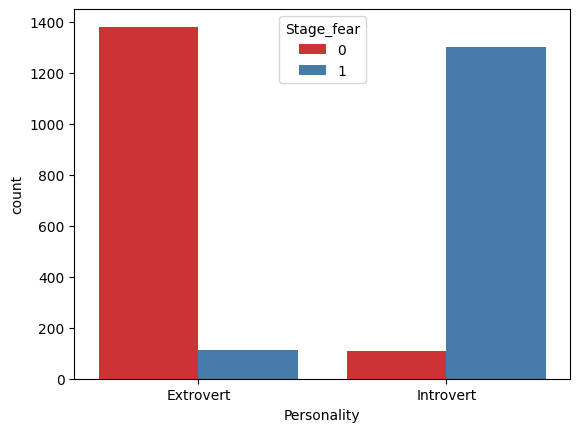

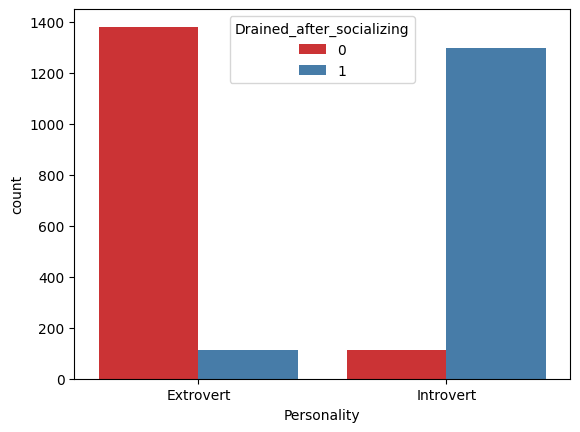

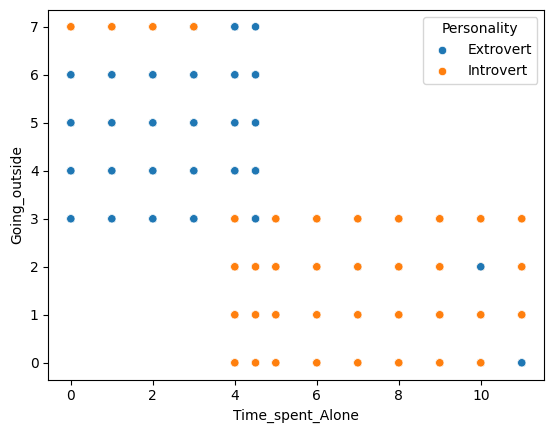

In [47]:
# Sebaran data personality type
sns.countplot(data=personality_data, x = 'Personality', hue='Stage_fear', palette='Set1')
plt.show()

sns.countplot(data=personality_data, x = 'Personality', hue='Drained_after_socializing', palette='Set1')
plt.show()

# Scatter plot untuk melihat hubungan antara dua variabel
sns.scatterplot(data=personality_data, x  = 'Time_spent_Alone', y = 'Going_outside', hue='Personality')
plt.show()

Models for machine learning with Random Forest Classifier and GridSearchCV

In [48]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

Train data

In [49]:
X = personality_data.drop(columns=['Personality'])
y = personality_data['Personality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Make a Parameter Tuning

In [50]:
params_grid = {
  'n_estimators': [50, 100, 150],
  'max_depth': [None, 10, 20],
  'min_samples_split': [2, 5, 10],
  'min_samples_leaf': [1, 2, 4]
}
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=params_grid, cv=5, n_jobs=-1, verbose=2)
print("Starting Grid Search...")
grid_search.fit(X_train, y_train)
print('Parameter terbaik:', grid_search.best_params_)

Starting Grid Search...
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Parameter terbaik: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}


Evaluation Predict Models with metrics

In [51]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [52]:
best_rf_model = grid_search.best_estimator_
y_pred = best_rf_model.predict(X_test)

print("Akurasi:", accuracy_score(y_test, y_pred))
print("Laporan Klasifikasi:\n", classification_report(y_test, y_pred))
print("Matriks Kebingungan:\n", confusion_matrix(y_test, y_pred))

Akurasi: 0.9293103448275862
Laporan Klasifikasi:
               precision    recall  f1-score   support

   Extrovert       0.94      0.92      0.93       302
   Introvert       0.92      0.94      0.93       278

    accuracy                           0.93       580
   macro avg       0.93      0.93      0.93       580
weighted avg       0.93      0.93      0.93       580

Matriks Kebingungan:
 [[278  24]
 [ 17 261]]


Save Models

In [53]:
import joblib

In [ ]:
best_models = joblib.dump(best_rf_model, 'best_personality_model.pkl')